In [16]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    StratifiedKFold
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Librería para manejo de desbalance de clases
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.metrics import classification_report_imbalanced

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_theme()

# Configuración adicional de matplotlib
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.grid': True,
    'figure.autolayout': True,
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14
})

# Configuración para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Cargar los Datos

In [17]:
def load_and_check_data(file_paths):
    """
    Carga y realiza verificaciones iniciales de los datos
    """
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            print(f"Dataset cargado exitosamente desde: {path}")

            # Verificación inicial de datos
            print("\nInformación básica del dataset:")
            print(df.info())

            # Verificar valores faltantes
            missing_values = df.isnull().sum()
            print("\nValores faltantes por columna:")
            print(missing_values[missing_values > 0])

            # Verificar tipos de datos
            print("\nTipos de datos:")
            print(df.dtypes)

            return df
        except FileNotFoundError:
            continue
    raise FileNotFoundError("No se pudo encontrar el archivo en ninguna de las rutas especificadas")

# Uso de la función
file_paths = [
    "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv",
    "data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
]
df = load_and_check_data(file_paths)

Dataset cargado exitosamente desde: ../data/WA_Fn-UseC_-Telco-Customer-Churn.csv

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043

## Análisis Exploratorio de Dato

In [18]:
# Resumen Estadístico:
print("Resumen Estadístico:")
print(df.describe())
print("\n")

Resumen Estadístico:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000




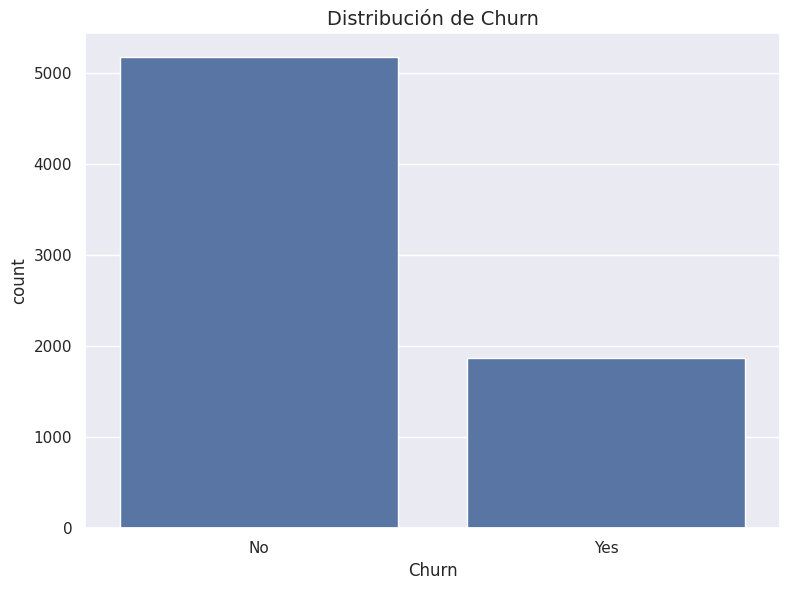

In [19]:
# Distribución de Clases:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()


Variables Categóricas:

Distribución de gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64


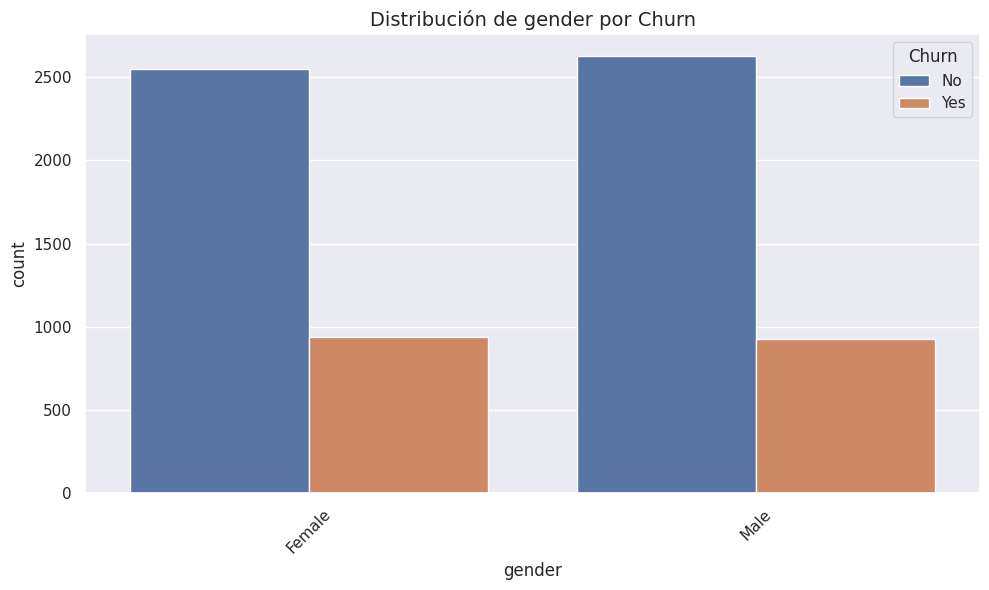


Distribución de Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


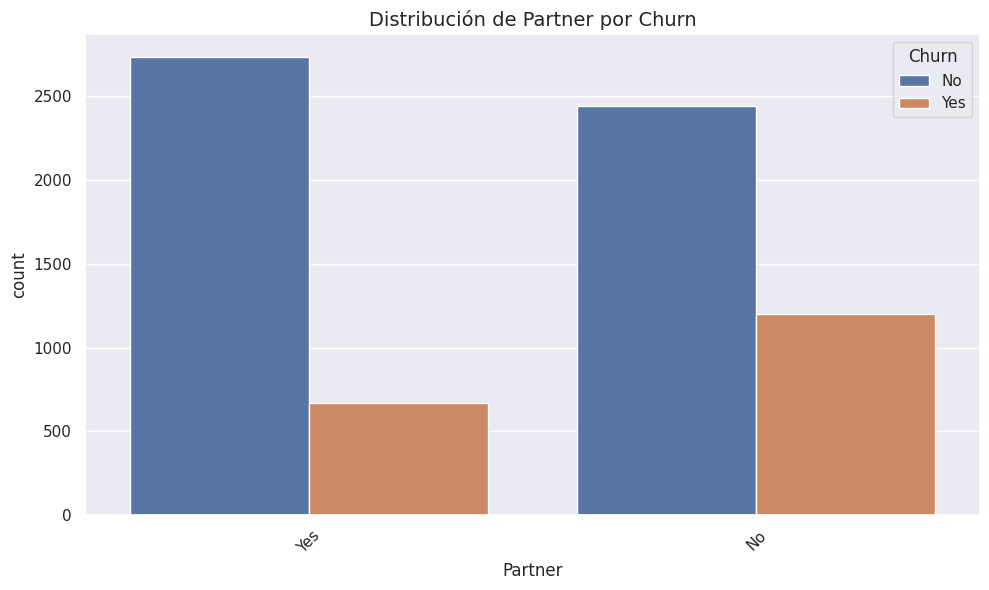


Distribución de Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


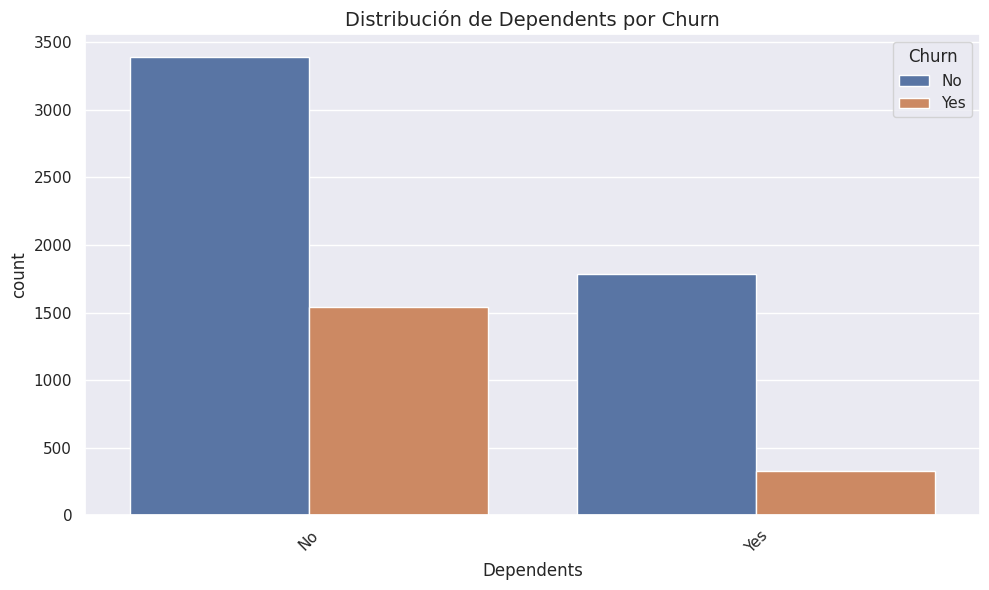


Distribución de PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


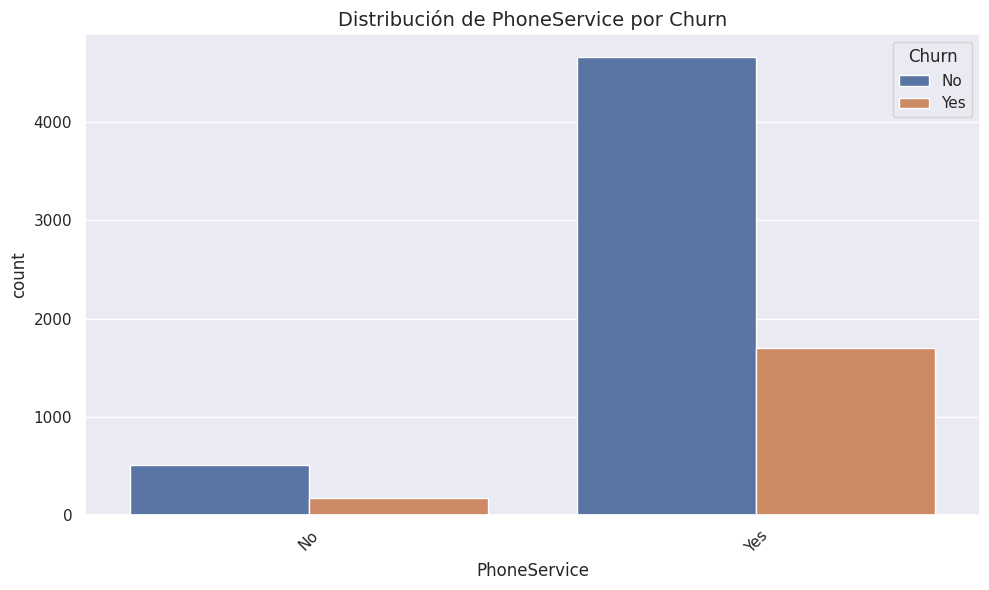


Distribución de MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


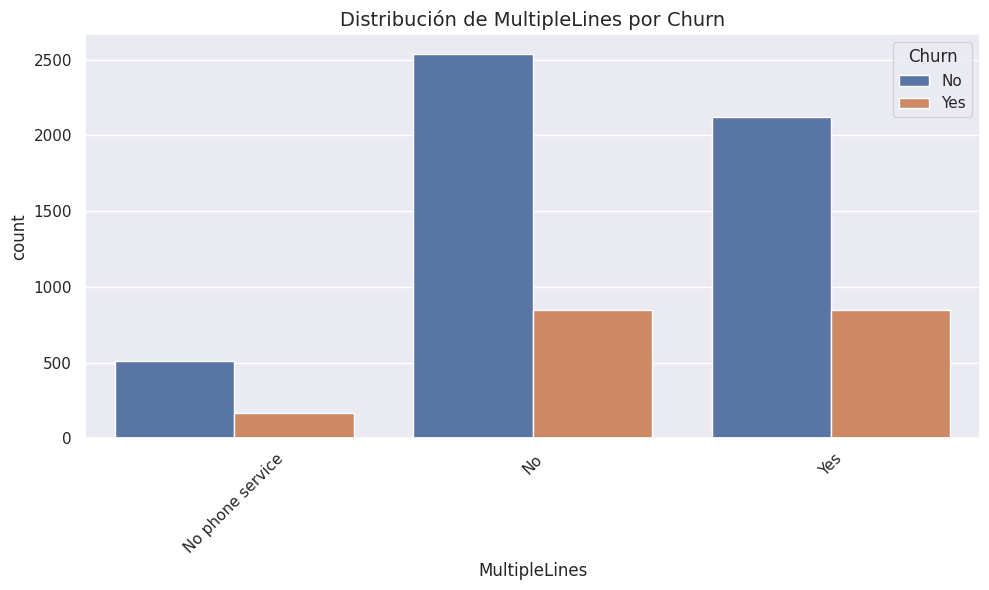


Distribución de InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


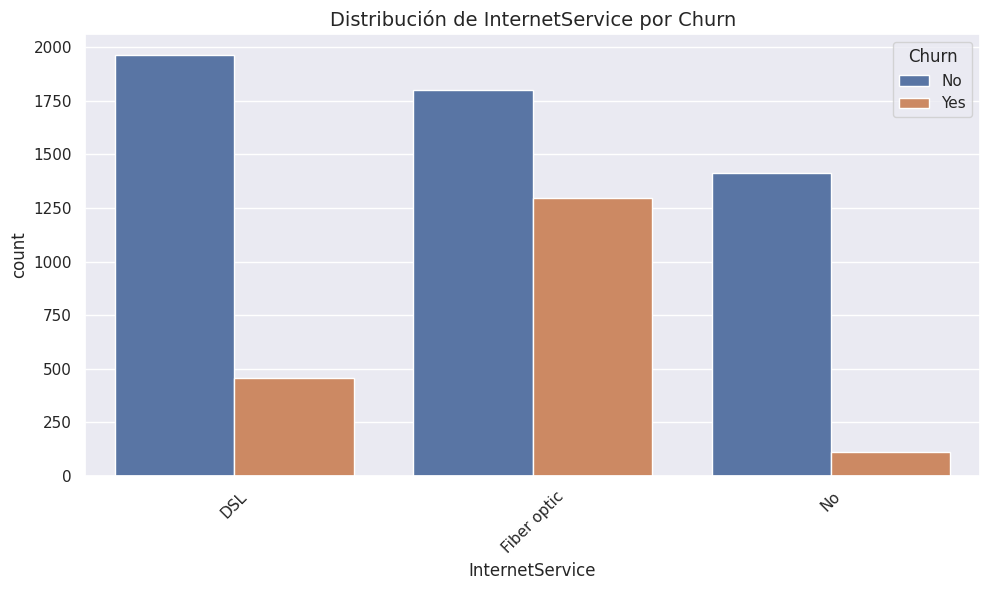


Distribución de OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


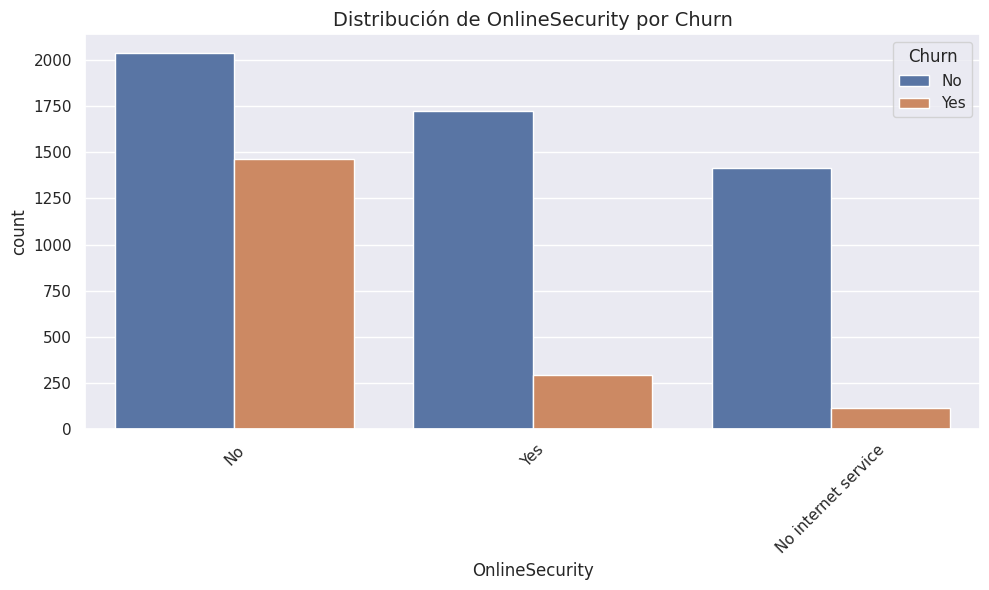


Distribución de OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


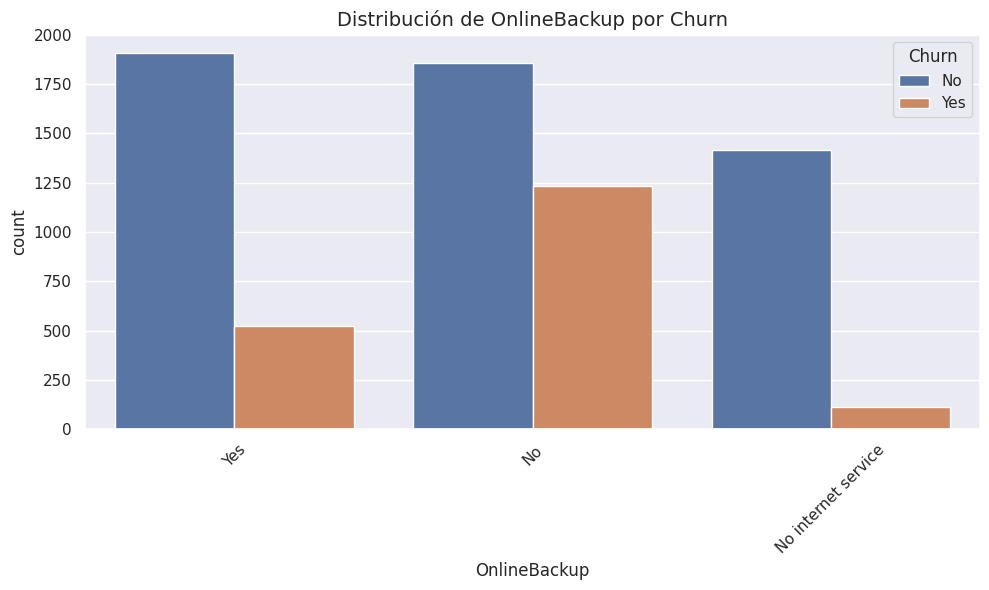


Distribución de DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


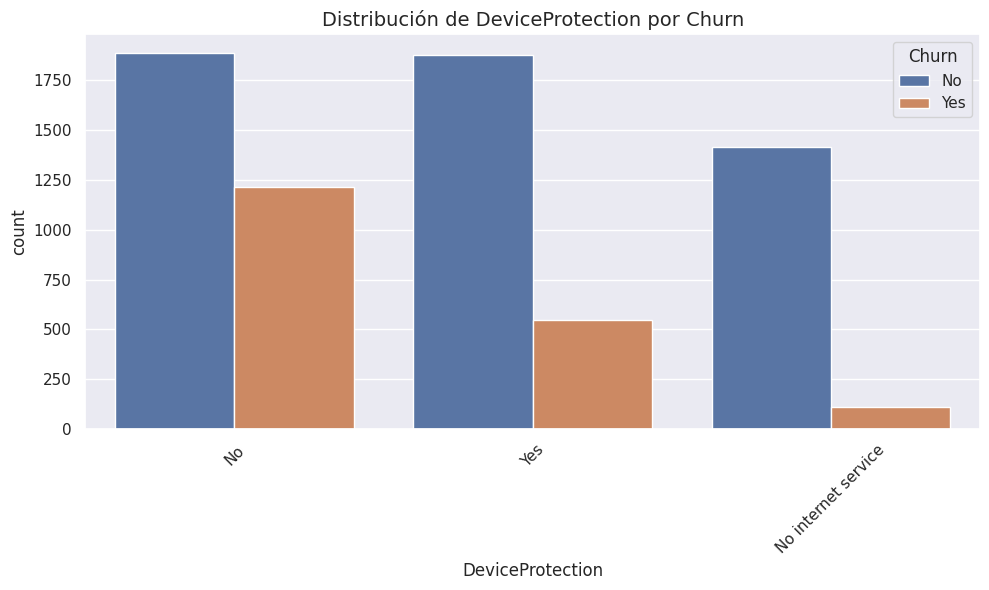


Distribución de TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


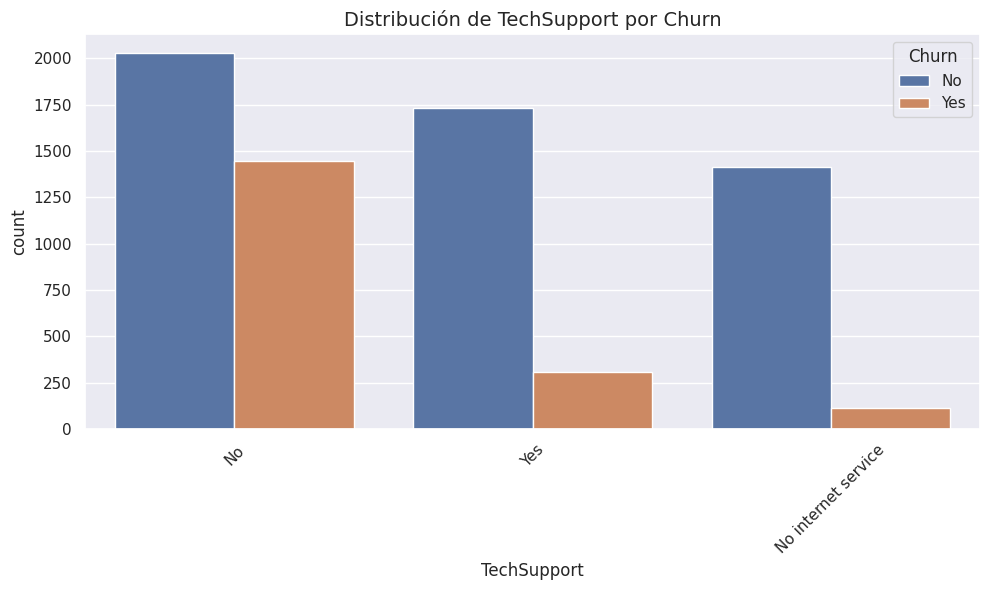


Distribución de StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


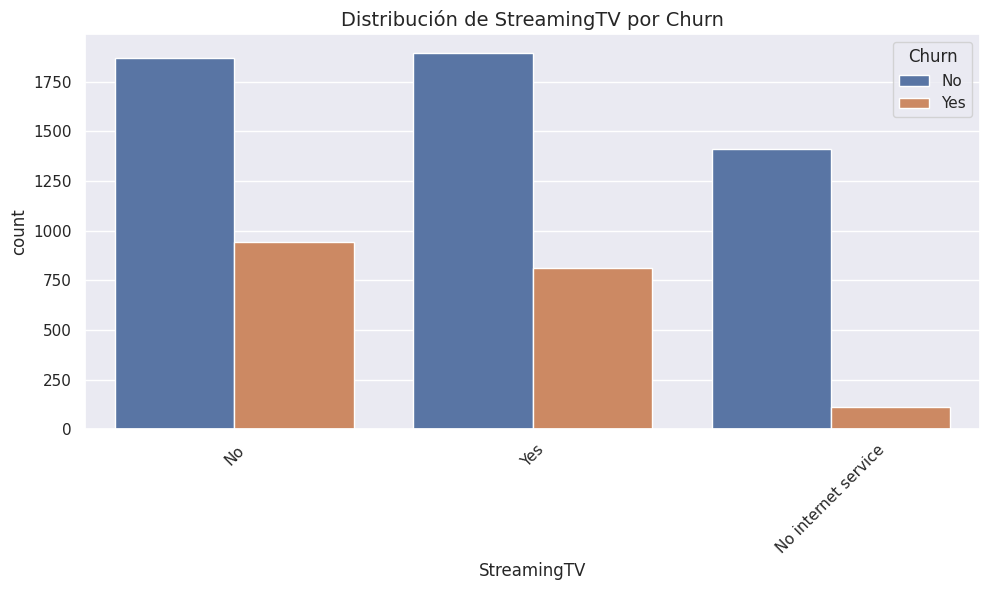


Distribución de StreamingMovies:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


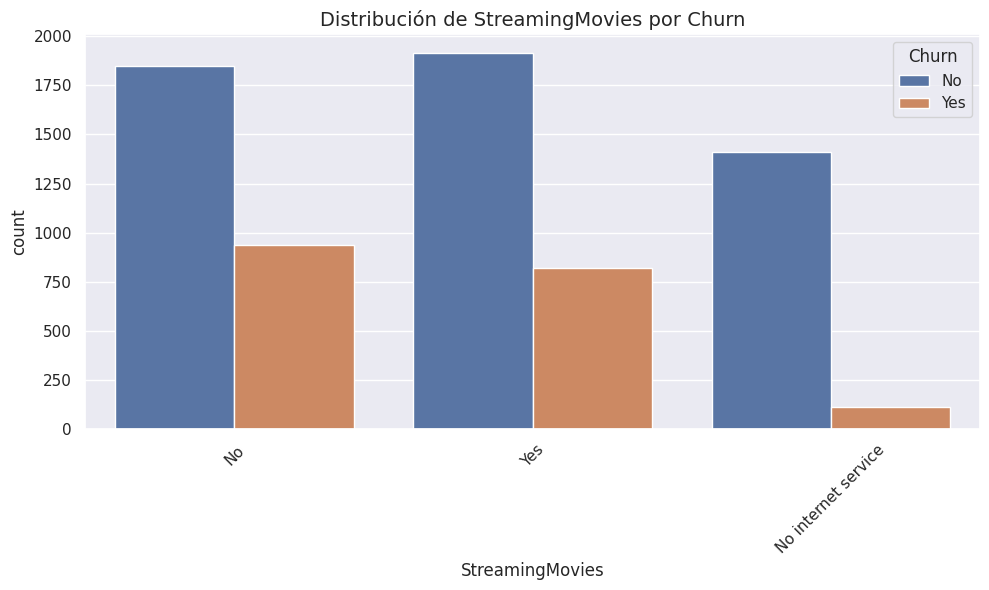


Distribución de Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


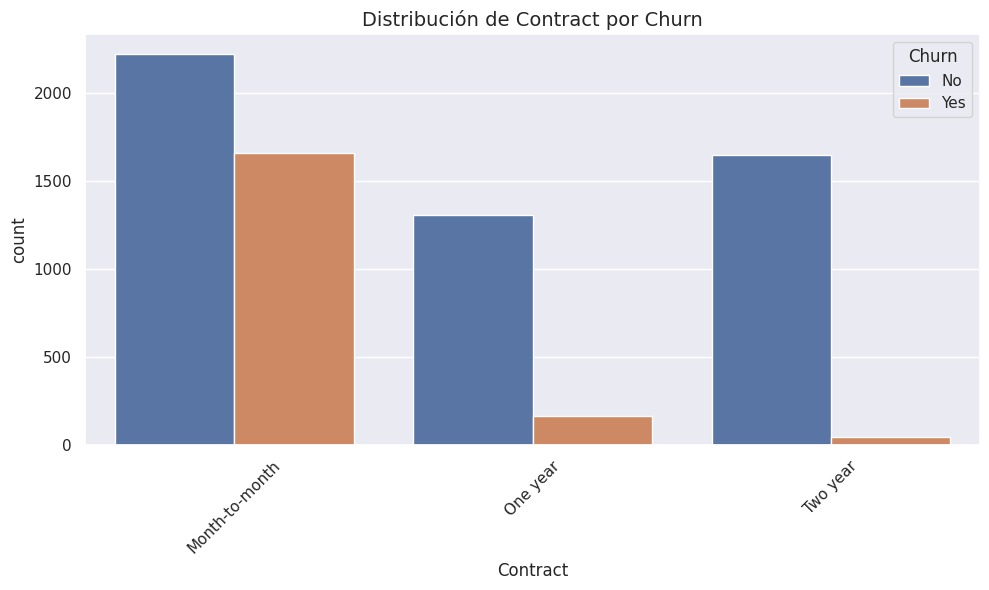


Distribución de PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


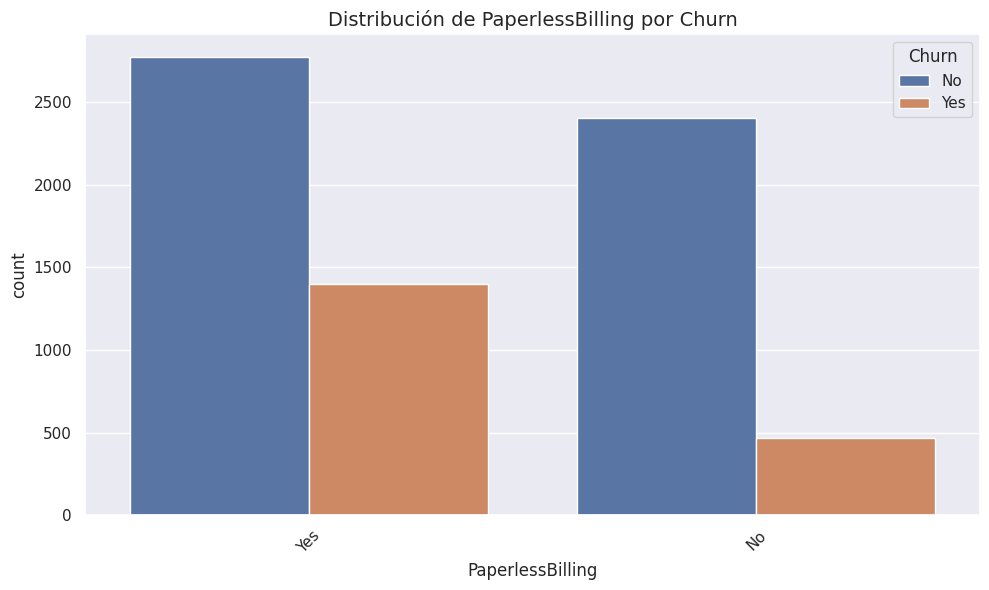


Distribución de PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


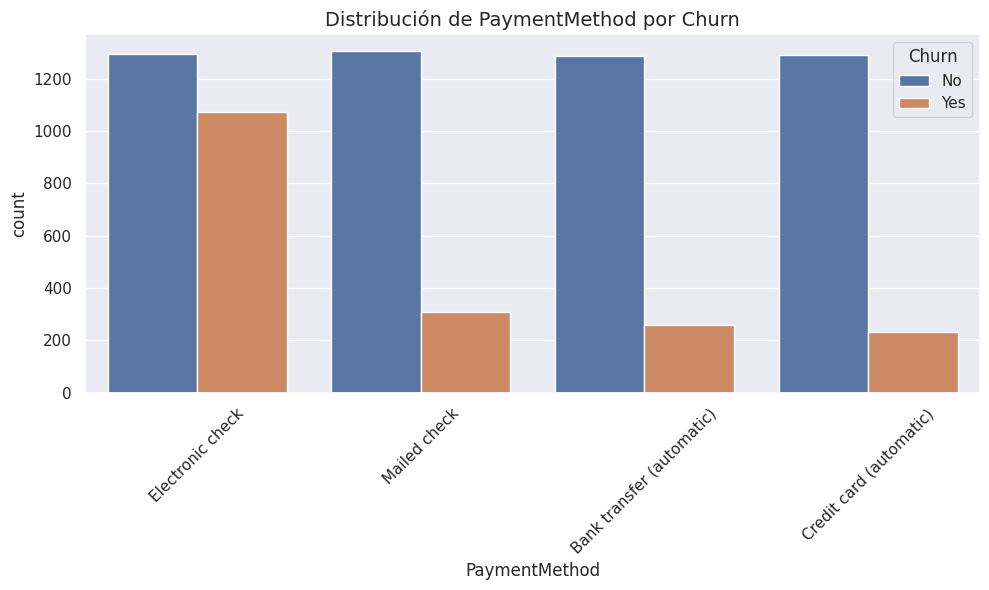


Distribución de TotalCharges:
TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
130.15      1
3211.9      1
7843.55     1
2196.3      1
197.4       1
Name: count, Length: 6531, dtype: int64


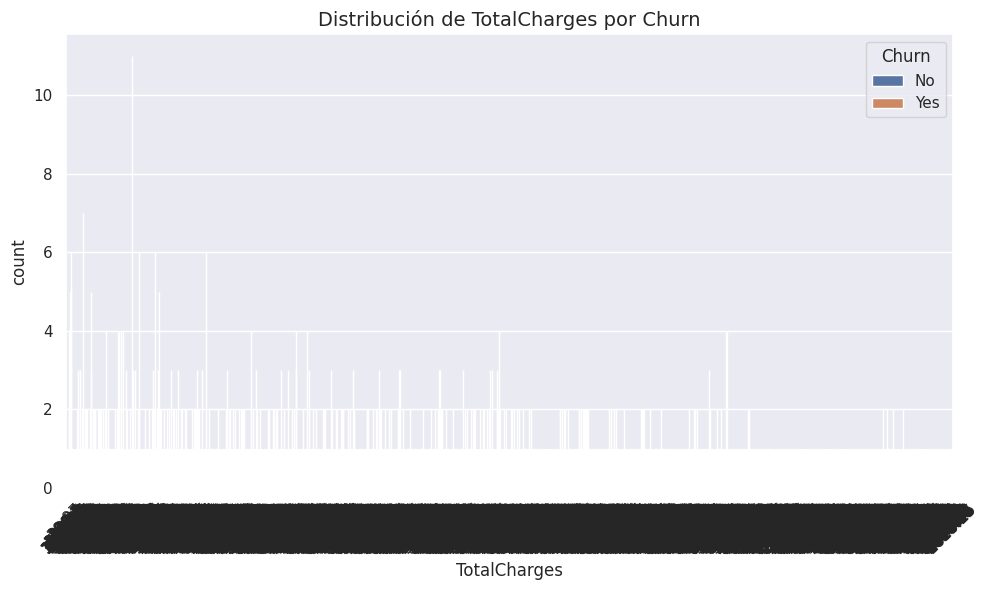


Distribución de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


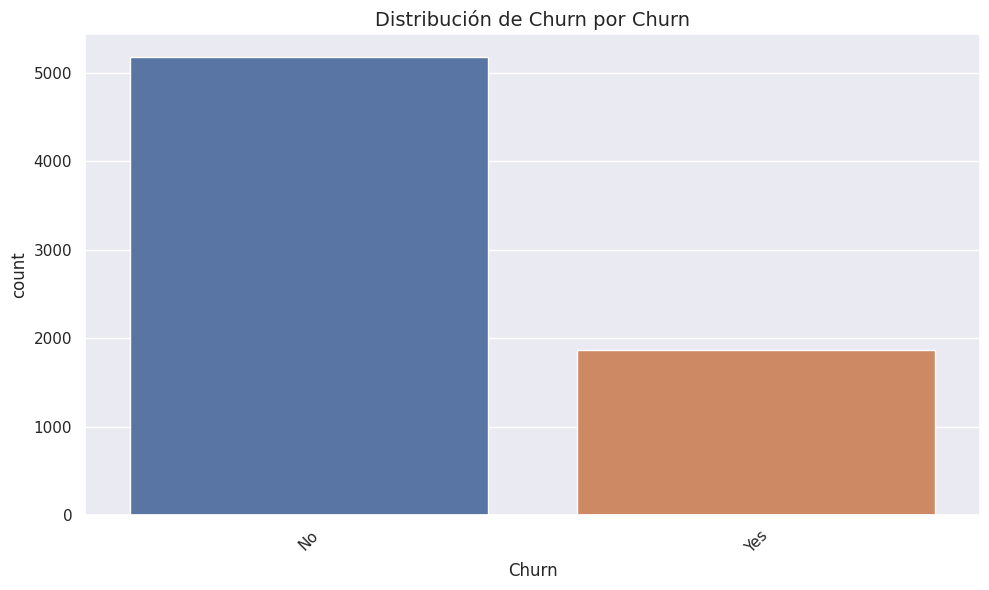

In [20]:
# Análisis de Variables Categóricas:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nVariables Categóricas:")
for col in categorical_columns:
    if col != 'customerID':  # Excluimos el ID del cliente
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts())

        # Visualización
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'Distribución de {col} por Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

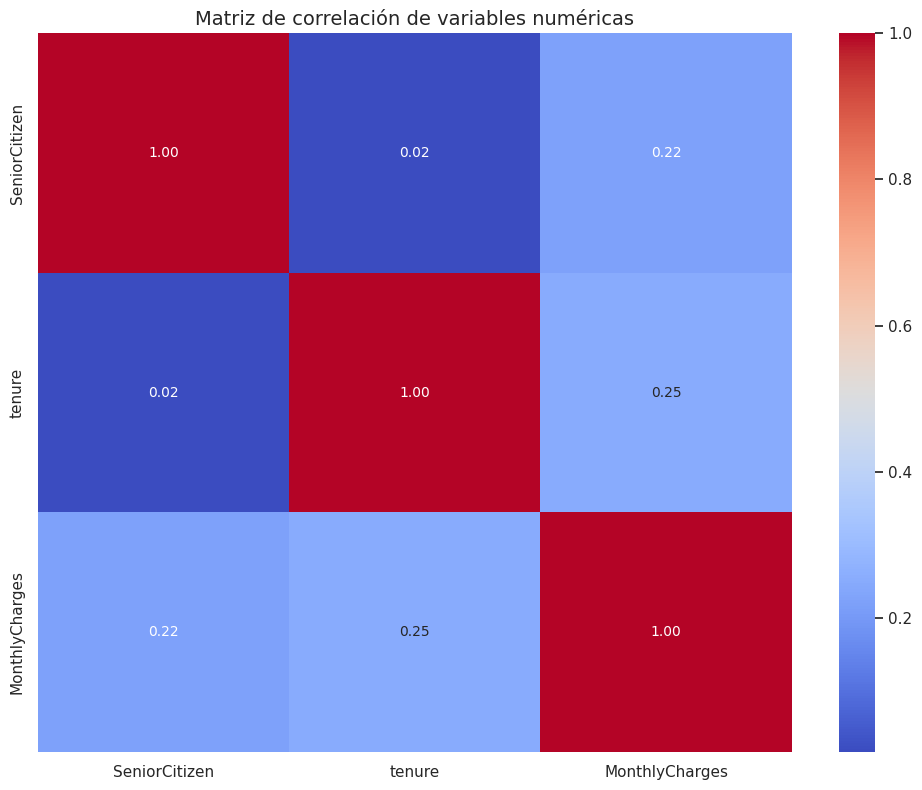

In [21]:
# Correlación entre Variables Numéricas:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

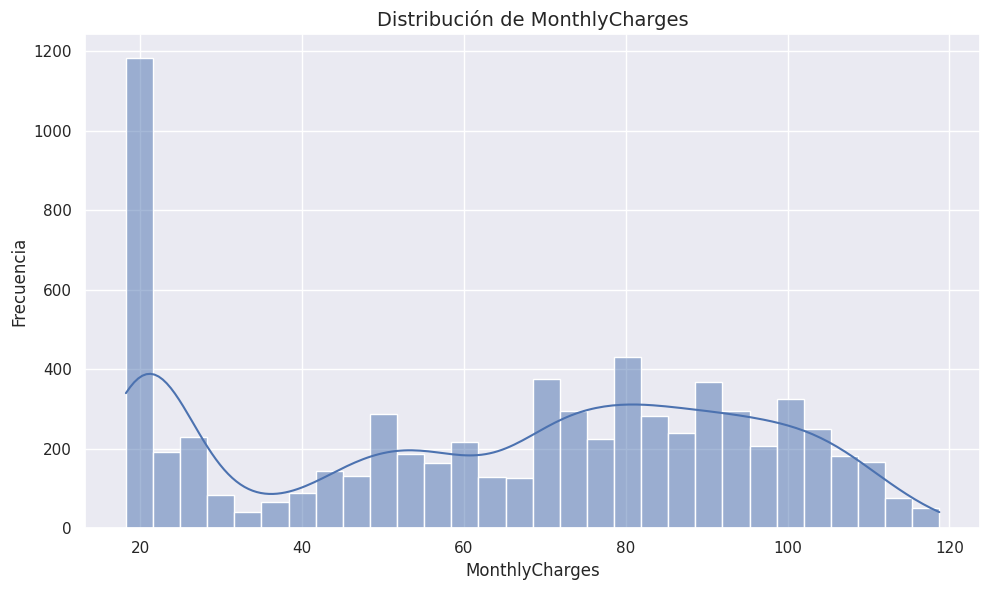


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [22]:
# Histograma de Ingresos:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

# Información adicional sobre el dataset
print("\nInformación del Dataset:")
print(df.info())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

### Función de evaluación del modelo

In [23]:
def evaluate_model(y_true, y_pred, y_prob=None):
    """
    Función para evaluar el modelo con múltiples métricas
    """
    print("\n=== Métricas de Evaluación ===")

    # Métricas básicas
    print("\nInforme de clasificación detallado:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    if y_prob is not None:
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

        # Curva Precisión-Recall
        precision, recall, _ = precision_recall_curve(y_true, y_prob[:, 1])

        plt.figure(figsize=(10, 8))
        plt.plot(recall, precision, color='blue', lw=2)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Curva Precisión-Recall')
        plt.show()

### Selección de Características

In [24]:
def select_features(X, y):
    """
    Selección de características usando Random Forest
    """
    rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
    selector = SelectFromModel(rf, prefit=False)
    selector.fit(X, y)

    # Obtener características importantes
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': selector.estimator_.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    # Visualizar importancia de características
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Características más Importantes')
    plt.show()

    return selector.get_support(), feature_importance

## Preparación de Datos

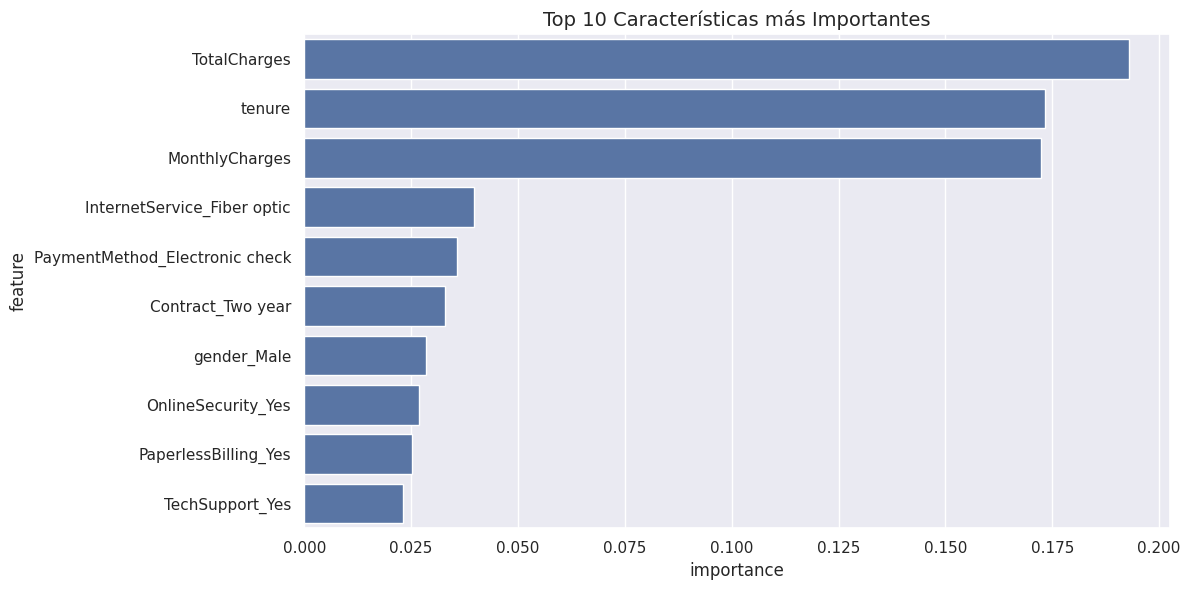

Distribución original de clases en entrenamiento:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución después de SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [25]:
# Convertir 'TotalCharges' a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Rellenar valores faltantes en 'TotalCharges' con la mediana
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Codificar la columna objetivo 'Churn' como binaria
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Eliminar columnas irrelevantes
df = df.drop(['customerID'], axis=1)

# Codificar variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar características y variable objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Selección de características
support_mask, feature_importance = select_features(X, y)
X_selected = X.loc[:, support_mask]

# División estratificada de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para balance de clases
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Distribución original de clases en entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribución después de SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

## Implementación de KNN

### Entrenamiento del Modelo

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Mejor puntuación F1: 0.8136512367016442

=== Métricas de Evaluación ===

Informe de clasificación detallado:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1035
           1       0.44      0.60      0.51       374

    accuracy                           0.69      1409
   macro avg       0.64      0.66      0.64      1409
weighted avg       0.73      0.69      0.70      1409



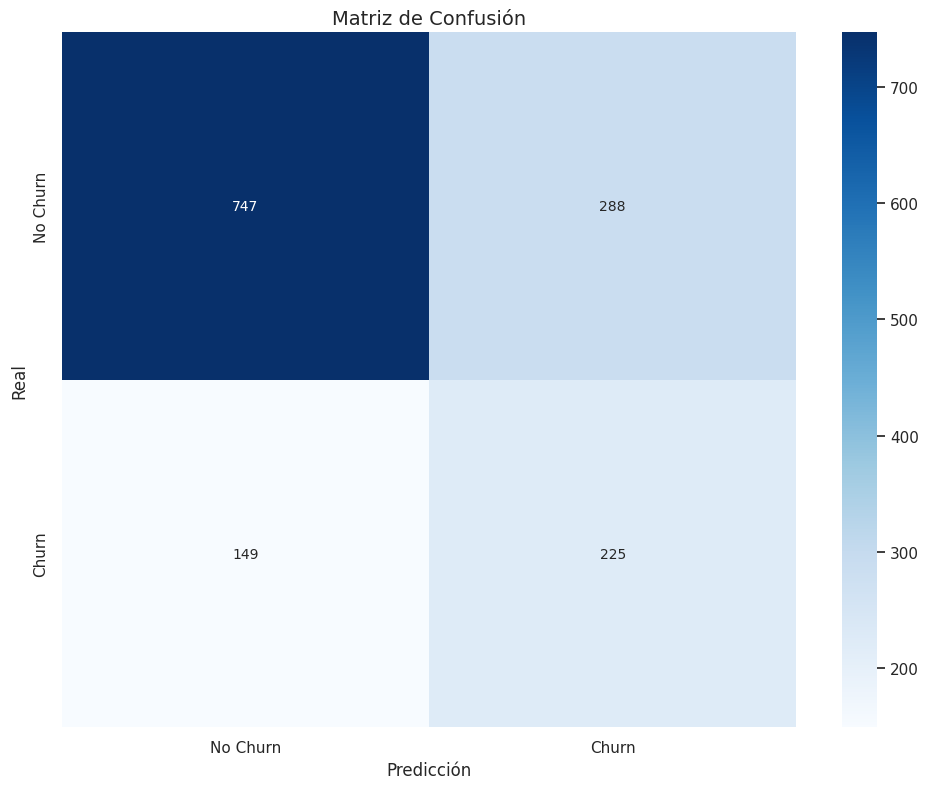

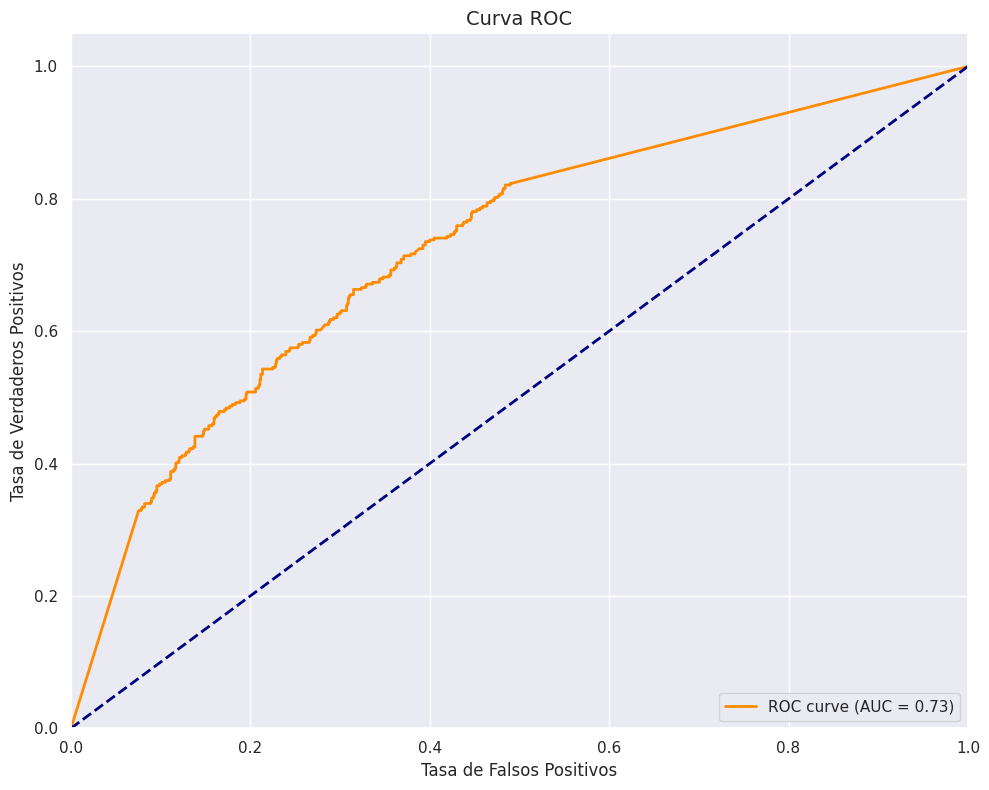

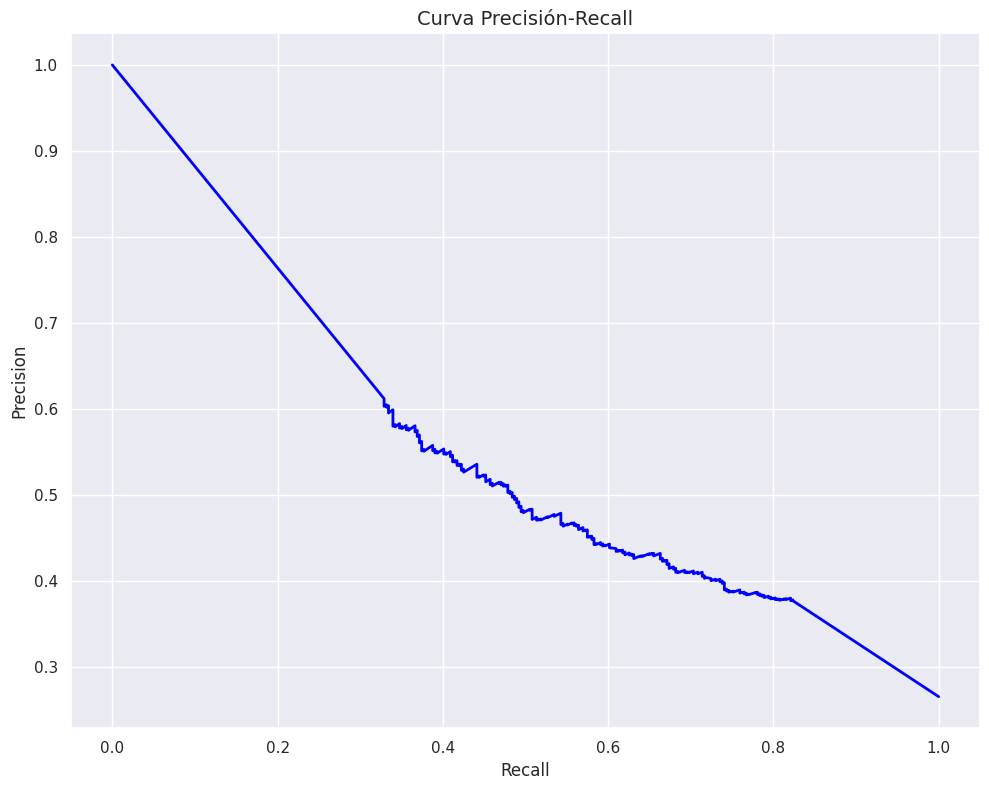

In [26]:
# Definir parámetros para búsqueda
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

# Ajustar el modelo
grid_search.fit(X_train_balanced, y_train_balanced)

# Mostrar mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación F1:", grid_search.best_score_)

# Entrenar modelo final con mejores parámetros
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred = best_knn.predict(X_test_scaled)
y_prob = best_knn.predict_proba(X_test_scaled)

# Evaluación completa
evaluate_model(y_test, y_pred, y_prob)

### Visualización de Precisión para Diferentes Vecinos

Mejor número de vecinos (k): 10
Mejor precisión: 0.7963


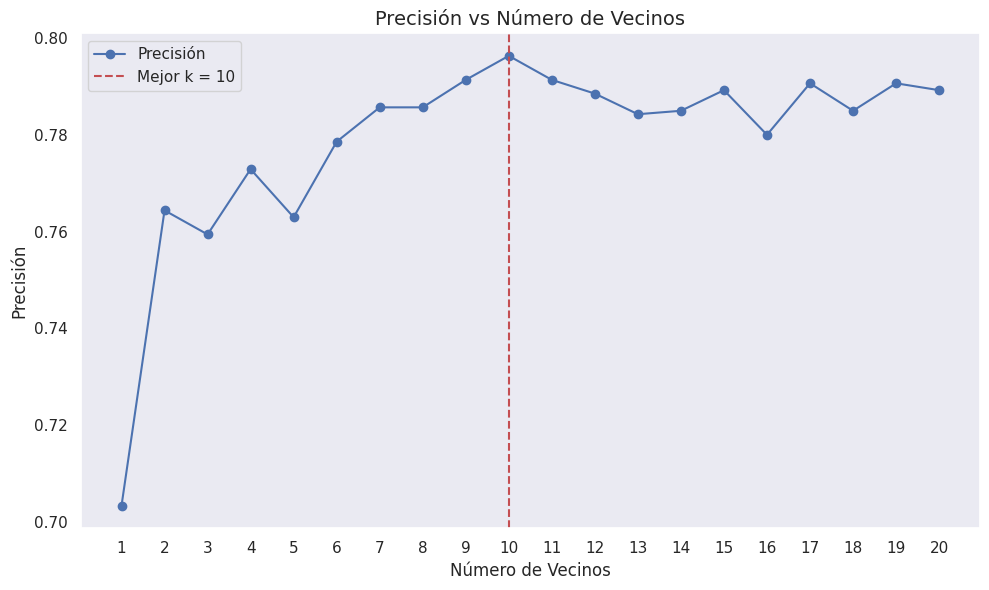

In [27]:
# Probar diferentes valores de n_neighbors y encontrar el mejor k
accuracies = []
best_accuracy = 0
best_k = 1

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Actualizar el mejor k si encontramos una mejor precisión
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Mejor número de vecinos (k): {best_k}")
print(f"Mejor precisión: {best_accuracy:.4f}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', label='Precisión')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor k = {best_k}')
plt.title("Precisión vs Número de Vecinos")
plt.xlabel("Número de Vecinos")
plt.ylabel("Precisión")
plt.xticks(range(1, 21))
plt.legend()
plt.grid()
plt.show()

### Curvas de Aprendizaje

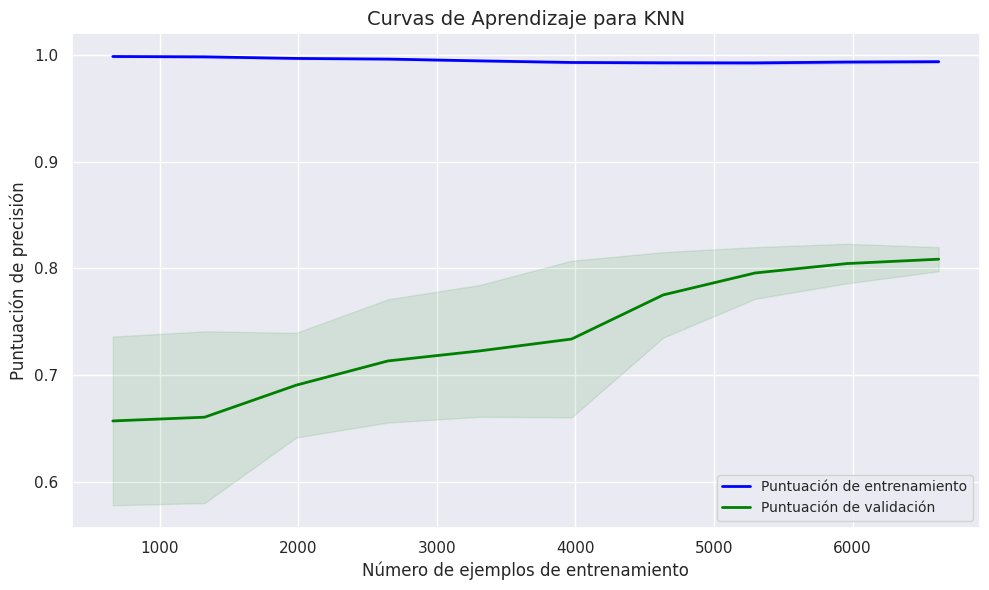

In [28]:
# Importaciones necesarias
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

def plot_learning_curve(estimator, X, y, cv=5):
    """
    Genera curvas de aprendizaje para evaluar el rendimiento del modelo
    """
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Usar 'accuracy' en lugar de 'f1' para evitar problemas con las etiquetas
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy'  # Cambiado de 'f1' a 'accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Puntuación de entrenamiento', color='blue', linewidth=2)
    plt.plot(train_sizes, test_mean, label='Puntuación de validación', color='green', linewidth=2)
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color='green')
    plt.xlabel('Número de ejemplos de entrenamiento', fontsize=12)
    plt.ylabel('Puntuación de precisión', fontsize=12)
    plt.title('Curvas de Aprendizaje para KNN', fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)
    plt.show()

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Crear y entrenar el modelo KNN con los mejores parámetros
best_knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean')
best_knn.fit(X_train_balanced, y_train_balanced)

# Generar las curvas de aprendizaje
plot_learning_curve(best_knn, X_train_balanced, y_train_balanced)